Available HDUs in spatial binning file:
Filename: NGC4383_SPATIAL_BINNING_maps_extended.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  BINID         1 ImageHDU        26   (633, 705)   float64   
  2  FLUX          1 ImageHDU        26   (633, 705)   float64   
  3  SNR           1 ImageHDU        26   (633, 705)   float64   
  4  SNRBIN        1 ImageHDU        26   (633, 705)   float64   
  5  XBIN          1 ImageHDU        26   (633, 705)   float64   
  6  YBIN          1 ImageHDU        26   (633, 705)   float64   
  7  FLUX_R_corr    1 ImageHDU        27   (633, 705)   float64   
  8  ML_R          1 ImageHDU        27   (633, 705)   float64   
  9  LOGMSTAR      1 ImageHDU        27   (633, 705)   float64   
 10  LOGMASS_SURFACE_DENSITY    1 ImageHDU        27   (633, 705)   float64   
 11  MAGNITUDE_R    1 ImageHDU        27   (633, 705)   float64   
 12  MAGNITUDE_R_UNCORRECTED    1 ImageHDU        27 

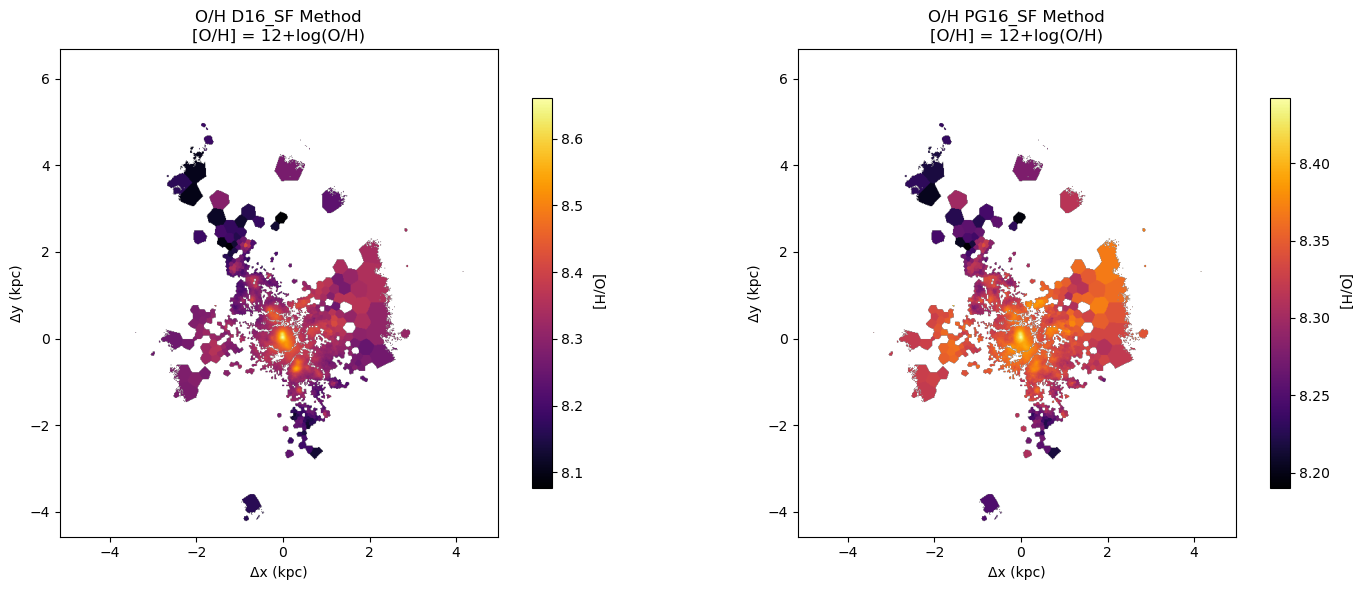

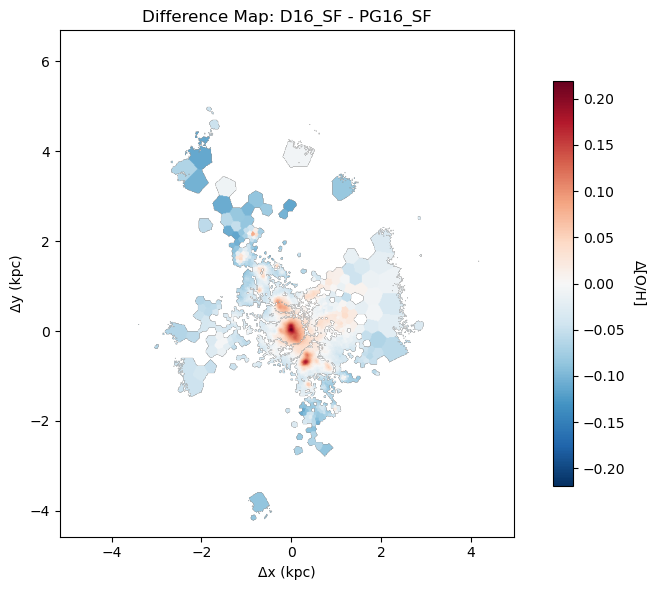


Difference statistics:
Mean difference: -0.0315
Std difference: 0.0429
Min difference: -0.1146
Max difference: 0.2192


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib.colors as colors

# Read the spatial binning file to get LOGMSTAR data and center position
spatial_binning_file = "NGC4383_SPATIAL_BINNING_maps_extended.fits"

with fits.open(spatial_binning_file) as hdul_spatial:
    print("Available HDUs in spatial binning file:")
    hdul_spatial.info()
    
    # Read LOGMSTAR data
    logmstar = hdul_spatial["LOGMSTAR"].data
    print(f"\nLOGMSTAR shape: {logmstar.shape}")
    print(f"LOGMSTAR - Min: {np.nanmin(logmstar):.3f}, Max: {np.nanmax(logmstar):.3f}")
    
    # Find the position of maximum stellar mass
    max_idx = np.unravel_index(np.nanargmax(logmstar), logmstar.shape)
    center_y, center_x = max_idx
    print(f"Maximum LOGMSTAR position (y, x): ({center_y}, {center_x})")
    print(f"Maximum LOGMSTAR value: {logmstar[center_y, center_x]:.3f}")

# Calculate physical scale
# 0.2 arcsec per pixel, distance = 16.5 Mpc
arcsec_per_pixel = 0.2
distance_mpc = 16.5

# Convert arcsec to radians
arcsec_to_rad = np.pi / (180 * 3600)
pixel_size_rad = arcsec_per_pixel * arcsec_to_rad

# Calculate physical size per pixel in kpc
# Physical size = angular size (rad) × distance (Mpc) × 1000 (to convert Mpc to kpc)
kpc_per_pixel = pixel_size_rad * distance_mpc * 1000

print(f"\nPhysical scale:")
print(f"Pixel size: {arcsec_per_pixel} arcsec")
print(f"Distance: {distance_mpc} Mpc")
print(f"Physical size per pixel: {kpc_per_pixel:.3f} kpc/pixel")

# Read the metallicity maps from the gas binning file
fits_file = "NGC4383_gas_BIN_maps_extended.fits"

with fits.open(fits_file) as hdul:
    # Print available HDUs to see what's in the file
    print("\nAvailable HDUs in gas binning file:")
    hdul.info()
    
    # Read the metallicity maps
    o_h_d16_sf = hdul["O_H_D16_SF"].data
    o_h_pg16_sf = hdul["O_H_PG16_SF"].data
    
    print(f"\nO_H_D16_SF shape: {o_h_d16_sf.shape}")
    print(f"O_H_PG16_SF shape: {o_h_pg16_sf.shape}")
    
    # Check for NaN values and data range
    print(f"\nO_H_D16_SF - Min: {np.nanmin(o_h_d16_sf):.3f}, Max: {np.nanmax(o_h_d16_sf):.3f}")
    print(f"O_H_PG16_SF - Min: {np.nanmin(o_h_pg16_sf):.3f}, Max: {np.nanmax(o_h_pg16_sf):.3f}")

# Get the shape and create coordinate arrays
ny, nx = o_h_d16_sf.shape
print(f"\nMap dimensions: {ny} × {nx} pixels")

# Create coordinate arrays centered on the maximum stellar mass position
x_pixels = np.arange(nx) - center_x
y_pixels = np.arange(ny) - center_y

# Convert to physical coordinates in kpc
x_kpc = x_pixels * kpc_per_pixel
y_kpc = y_pixels * kpc_per_pixel

print(f"X coordinate range: {x_kpc[0]:.1f} to {x_kpc[-1]:.1f} kpc")
print(f"Y coordinate range: {y_kpc[0]:.1f} to {y_kpc[-1]:.1f} kpc")

# Print the maximum and minimum values of the metallicity maps
print(f"O_H_D16_SF - Min: {np.nanmin(o_h_d16_sf):.4f}, Max: {np.nanmax(o_h_d16_sf):.4f}")
print(f"O_H_PG16_SF - Min: {np.nanmin(o_h_pg16_sf):.4f}, Max: {np.nanmax(o_h_pg16_sf):.4f}")

# Create the metallicity comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot O_H_D16_SF
im1 = ax1.imshow(o_h_d16_sf, cmap='inferno', origin='lower', 
                 extent=[x_kpc[0], x_kpc[-1], y_kpc[0], y_kpc[-1]])
ax1.set_title('O/H D16_SF Method\n[O/H] = 12+log(O/H)', fontsize=12)
ax1.set_xlabel('Δx (kpc)')
ax1.set_ylabel('Δy (kpc)')
cbar1 = plt.colorbar(im1, ax=ax1, shrink=0.8)
cbar1.set_label('[O/H]', rotation=270, labelpad=15)

# Plot O_H_PG16_SF
im2 = ax2.imshow(o_h_pg16_sf, cmap='inferno', origin='lower',
                 extent=[x_kpc[0], x_kpc[-1], y_kpc[0], y_kpc[-1]])
ax2.set_title('O/H PG16_SF Method\n[O/H] = 12+log(O/H)', fontsize=12)
ax2.set_xlabel('Δx (kpc)')
ax2.set_ylabel('Δy (kpc)')
cbar2 = plt.colorbar(im2, ax=ax2, shrink=0.8)
cbar2.set_label('[O/H]', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# Create a difference map
fig, ax3 = plt.subplots(1, 1, figsize=(8, 6))
difference = o_h_d16_sf - o_h_pg16_sf

# Set the color map midpoint at zero
vmax = max(abs(np.nanmin(difference)), abs(np.nanmax(difference)))
norm = colors.TwoSlopeNorm(vmin=-vmax, vcenter=0, vmax=vmax)

im3 = ax3.imshow(difference, cmap='RdBu_r', origin='lower', norm=norm,
                 extent=[x_kpc[0], x_kpc[-1], y_kpc[0], y_kpc[-1]])
ax3.set_title('Difference Map: D16_SF - PG16_SF', fontsize=12)
ax3.set_xlabel('Δx (kpc)')
ax3.set_ylabel('Δy (kpc)')
cbar3 = plt.colorbar(im3, ax=ax3, shrink=0.8)
cbar3.set_label('Δ[O/H]', rotation=270, labelpad=15)
plt.tight_layout()
plt.show()

print(f"\nDifference statistics:")
print(f"Mean difference: {np.nanmean(difference):.4f}")
print(f"Std difference: {np.nanstd(difference):.4f}")
print(f"Min difference: {np.nanmin(difference):.4f}")
print(f"Max difference: {np.nanmax(difference):.4f}")

Central region definition:
Square size: 2.0 arcsec = 10 pixels
Half size: 5 pixels
Central square boundaries:
Y range: 281 to 291 (center at 286)
X range: 317 to 327 (center at 322)
Central region shapes:
D16_SF region: (11, 11)
PG16_SF region: (11, 11)

Total metallicity in central 2-arcsec square:
O/H D16_SF: 8.661
O/H PG16_SF: 8.442

For comparison - single pixel at exact center (286, 322):
O/H D16_SF: 8.629
O/H PG16_SF: 8.430

Maximum metallicity values:
O/H D16_SF max: 8.661
O/H PG16_SF max: 8.442

Is central square total higher than single pixel max?
D16_SF - Central square > max: False
PG16_SF - Central square > max: False

Actual maximum positions:
D16_SF max at: (np.int64(288), np.int64(322))
PG16_SF max at: (np.int64(288), np.int64(322))
Stellar mass center at: (286, 322)

Valid pixels in central region:
D16_SF: 121/121
PG16_SF: 121/121

Normalized metallicity ranges:
D16_SF normalized: -0.585 to 0.000
PG16_SF normalized: -0.252 to 0.000


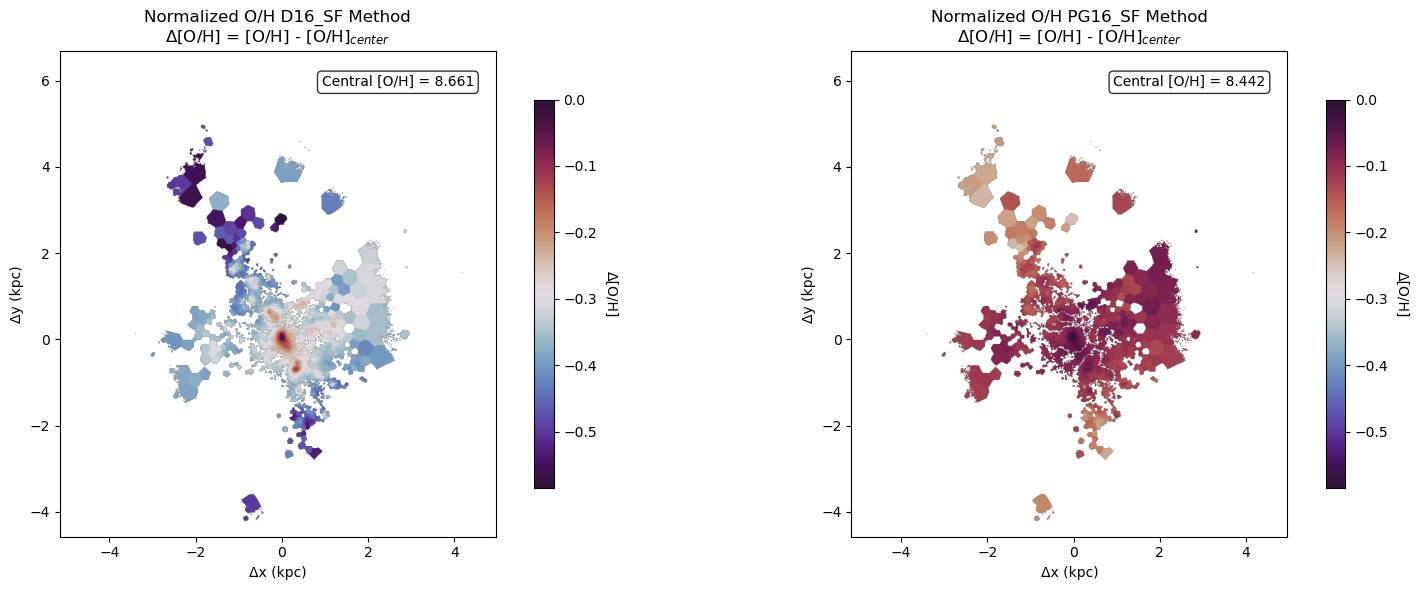

In [2]:
# Define the 2-arcsec square around the center position
# 2 arcsec = 10 pixels (since each pixel is 0.2 arcsec)
square_size_arcsec = 2.0
square_size_pixels = int(square_size_arcsec / arcsec_per_pixel)  # 10 pixels
half_size = square_size_pixels // 2  # 5 pixels

print(f"Central region definition:")
print(f"Square size: {square_size_arcsec} arcsec = {square_size_pixels} pixels")
print(f"Half size: {half_size} pixels")

# Define the boundaries of the central square
y_min = max(0, center_y - half_size)
y_max = min(ny, center_y + half_size + 1)
x_min = max(0, center_x - half_size)
x_max = min(nx, center_x + half_size + 1)

print(f"Central square boundaries:")
print(f"Y range: {y_min} to {y_max-1} (center at {center_y})")
print(f"X range: {x_min} to {x_max-1} (center at {center_x})")

# Extract the central regions for both metallicity maps
central_region_d16 = o_h_d16_sf[y_min:y_max, x_min:x_max]
central_region_pg16 = o_h_pg16_sf[y_min:y_max, x_min:x_max]

print(f"Central region shapes:")
print(f"D16_SF region: {central_region_d16.shape}")
print(f"PG16_SF region: {central_region_pg16.shape}")

# Calculate the maximum metallicity in the central region using logarithmic sum
# Formula: 12 + log10(sum(10^(Z_i - 12)))
center_oh_d16 = np.nanmax(central_region_d16)
center_oh_pg16 = np.nanmax(central_region_pg16)

print(f"\nTotal metallicity in central 2-arcsec square:")
print(f"O/H D16_SF: {center_oh_d16:.3f}")
print(f"O/H PG16_SF: {center_oh_pg16:.3f}")

# Also show individual pixel metallicity at the exact center for comparison
single_pixel_d16 = o_h_d16_sf[center_y, center_x]
single_pixel_pg16 = o_h_pg16_sf[center_y, center_x]

print(f"\nFor comparison - single pixel at exact center ({center_y}, {center_x}):")
print(f"O/H D16_SF: {single_pixel_d16:.3f}")
print(f"O/H PG16_SF: {single_pixel_pg16:.3f}")

# Check if center position has the maximum metallicity
max_oh_d16 = np.nanmax(o_h_d16_sf)
max_oh_pg16 = np.nanmax(o_h_pg16_sf)

print(f"\nMaximum metallicity values:")
print(f"O/H D16_SF max: {max_oh_d16:.3f}")
print(f"O/H PG16_SF max: {max_oh_pg16:.3f}")

print(f"\nIs central square total higher than single pixel max?")
print(f"D16_SF - Central square > max: {center_oh_d16 > max_oh_d16}")
print(f"PG16_SF - Central square > max: {center_oh_pg16 > max_oh_pg16}")

# Find actual maximum positions for comparison
max_pos_d16 = np.unravel_index(np.nanargmax(o_h_d16_sf), o_h_d16_sf.shape)
max_pos_pg16 = np.unravel_index(np.nanargmax(o_h_pg16_sf), o_h_pg16_sf.shape)

print(f"\nActual maximum positions:")
print(f"D16_SF max at: {max_pos_d16}")
print(f"PG16_SF max at: {max_pos_pg16}")
print(f"Stellar mass center at: ({center_y}, {center_x})")

# Count non-NaN pixels in the central region
valid_pixels_d16 = np.sum(np.isfinite(central_region_d16))
valid_pixels_pg16 = np.sum(np.isfinite(central_region_pg16))
print(f"\nValid pixels in central region:")
print(f"D16_SF: {valid_pixels_d16}/{central_region_d16.size}")
print(f"PG16_SF: {valid_pixels_pg16}/{central_region_pg16.size}")

# Create normalized metallicity maps
# Normalize each map to its central value
oh_d16_normalized = o_h_d16_sf - center_oh_d16
oh_pg16_normalized = o_h_pg16_sf - center_oh_pg16

print(f"\nNormalized metallicity ranges:")
print(f"D16_SF normalized: {np.nanmin(oh_d16_normalized):.3f} to {np.nanmax(oh_d16_normalized):.3f}")
print(f"PG16_SF normalized: {np.nanmin(oh_pg16_normalized):.3f} to {np.nanmax(oh_pg16_normalized):.3f}")

# Create the normalized metallicity plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Determine common color scale for both normalized maps
vmin_norm = min(np.nanmin(oh_d16_normalized), np.nanmin(oh_pg16_normalized))
vmax_norm = max(np.nanmax(oh_d16_normalized), np.nanmax(oh_pg16_normalized))

# Plot normalized O_H_D16_SF
im1 = ax1.imshow(oh_d16_normalized, cmap='twilight_shifted', origin='lower', 
                 extent=[x_kpc[0], x_kpc[-1], y_kpc[0], y_kpc[-1]],
                 vmin=vmin_norm, vmax=vmax_norm)
ax1.set_title('Normalized O/H D16_SF Method\nΔ[O/H] = [O/H] - [O/H]$_{center}$', fontsize=12)
ax1.set_xlabel('Δx (kpc)')
ax1.set_ylabel('Δy (kpc)')

# Add central metallicity text in top right
ax1.text(0.95, 0.95, f'Central [O/H] = {center_oh_d16:.3f}', 
         transform=ax1.transAxes, fontsize=10, ha='right', va='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

cbar1 = plt.colorbar(im1, ax=ax1, shrink=0.8)
cbar1.set_label('Δ[O/H]', rotation=270, labelpad=15)

# Plot normalized O_H_PG16_SF
im2 = ax2.imshow(oh_pg16_normalized, cmap='twilight_shifted', origin='lower',
                 extent=[x_kpc[0], x_kpc[-1], y_kpc[0], y_kpc[-1]],
                 vmin=vmin_norm, vmax=vmax_norm)
ax2.set_title('Normalized O/H PG16_SF Method\nΔ[O/H] = [O/H] - [O/H]$_{center}$', fontsize=12)
ax2.set_xlabel('Δx (kpc)')
ax2.set_ylabel('Δy (kpc)')

# Add central metallicity text in top right
ax2.text(0.95, 0.95, f'Central [O/H] = {center_oh_pg16:.3f}', 
         transform=ax2.transAxes, fontsize=10, ha='right', va='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

cbar2 = plt.colorbar(im2, ax=ax2, shrink=0.8)
cbar2.set_label('Δ[O/H]', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

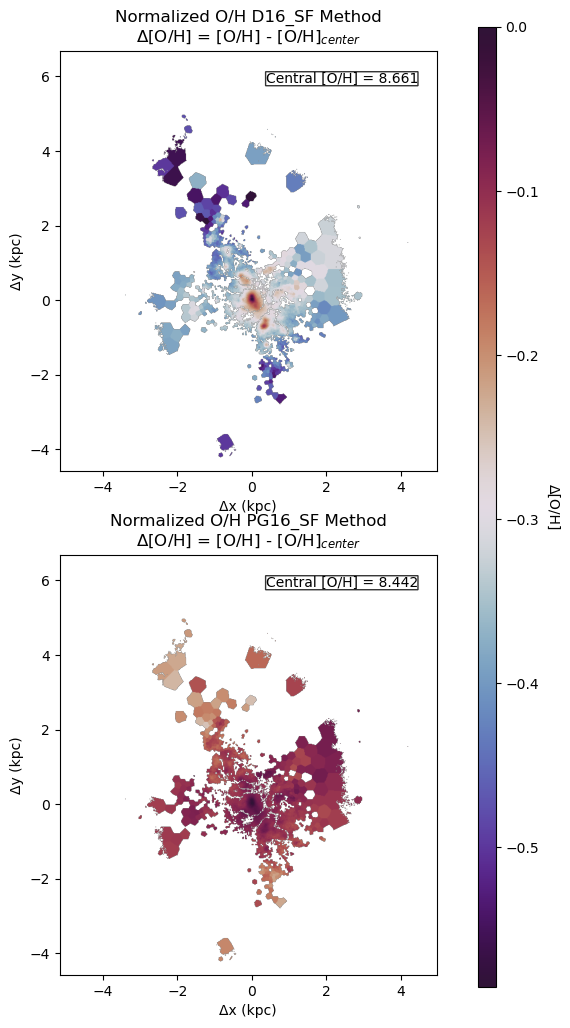

In [3]:
# Create the normalized metallicity plots with vertical layout and shared colorbar
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 12))  # Increased width to accommodate colorbar

# Determine common color scale for both normalized maps
vmin_norm = min(np.nanmin(oh_d16_normalized), np.nanmin(oh_pg16_normalized))
vmax_norm = max(np.nanmax(oh_d16_normalized), np.nanmax(oh_pg16_normalized))

# Plot normalized O_H_D16_SF
im1 = ax1.imshow(oh_d16_normalized, cmap='twilight_shifted', origin='lower', 
                 extent=[x_kpc[0], x_kpc[-1], y_kpc[0], y_kpc[-1]],
                 vmin=vmin_norm, vmax=vmax_norm)
ax1.set_title('Normalized O/H D16_SF Method\nΔ[O/H] = [O/H] - [O/H]$_{center}$', fontsize=12)
ax1.set_xlabel('Δx (kpc)')
ax1.set_ylabel('Δy (kpc)')

# Add central metallicity text in top right
ax1.text(0.95, 0.95, f'Central [O/H] = {center_oh_d16:.3f}', 
         transform=ax1.transAxes, fontsize=10, ha='right', va='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0))

# Plot normalized O_H_PG16_SF
im2 = ax2.imshow(oh_pg16_normalized, cmap='twilight_shifted', origin='lower',
                 extent=[x_kpc[0], x_kpc[-1], y_kpc[0], y_kpc[-1]],
                 vmin=vmin_norm, vmax=vmax_norm)
ax2.set_title('Normalized O/H PG16_SF Method\nΔ[O/H] = [O/H] - [O/H]$_{center}$', fontsize=12)
ax2.set_xlabel('Δx (kpc)')
ax2.set_ylabel('Δy (kpc)')

# Add central metallicity text in top right
ax2.text(0.95, 0.95, f'Central [O/H] = {center_oh_pg16:.3f}', 
         transform=ax2.transAxes, fontsize=10, ha='right', va='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0))

# Adjust subplot spacing to make room for colorbar
plt.subplots_adjust(right=0.85)

# Add shared colorbar on the right side
cbar_ax = fig.add_axes([0.87, 0.10, 0.03, 0.8])  # [left, bottom, width, height]
cbar = fig.colorbar(im2, cax=cbar_ax)
cbar.set_label('Δ[O/H]', rotation=270, labelpad=15)

plt.show()